<a href="https://colab.research.google.com/github/guifzy/matematica/blob/main/Modelo_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Carregar o DataFrame Titanic
df = pd.read_csv('/content/titanic.csv')

# Exibir as primeiras linhas do DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Colunas do DataFrame Titanic:
- Survived: Indica se o passageiro sobreviveu (1) ou não (0).
- Pclass: Classe do bilhete (1ª, 2ª ou 3ª).
- Sex: Gênero do passageiro.
- Age: Idade do passageiro.
- SibSp: Número de irmãos/cônjuges a bordo.
- Parch: Número de pais/filhos a bordo.
- Fare: Tarifa paga pelo bilhete.
- Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).
- Cabin: Número da cabine.
- Embark_town: Nome da cidade de embarque.
- Alive: Se a pessoa sobreviveu ou não (similar a Survived).
- Alone: Se a pessoa estava sozinha ou não.


# Etapas

Pré-processamento:
- 1 - Visualização
- 2 - Imputação(Valores Faltando)
- 3 - Categorização de Textos
- 4 - Normalização/Padronização

## Visualização

In [ ]:
# Informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Resumo estatístico das colunas numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Variância relativamente diferente entre as colunas numéricas

In [ ]:
# Verificar valores ausentes
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# identificação da coluna Deck
df['Cabin'].value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


## Imputação

Decisões:
- Média
  - Desvio Padrão
- Moda
- Mediana


- Remoção Total: Remoção de todos os valores faltantes, importante para colunas inuteis.

In [ ]:
# Imputação da idade com a mediana
df['Age'].fillna(df['Age'].median(), inplace=True) # implace diz que você quer alterar
                                                   # o dataframe atual

# Removor colunas redundantes como 'Alive' e 'Class'
df.drop(columns=['Name', 'Cabin', 'Ticket', 'Embarked'], inplace=True)

<ipython-input-111-d29ff7df7884>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) # implace diz que você quer alterar


Verificação

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


## Lidando com texto

In [ ]:
# Codificação da coluna 'Sex'
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

<ipython-input-116-257fc56b338b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


- 0 : Homem
- 1 : Mulher

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


# Visualizações

In [ ]:
import matplotlib.pyplot as plt

## Distribuição de Sobreviventes

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


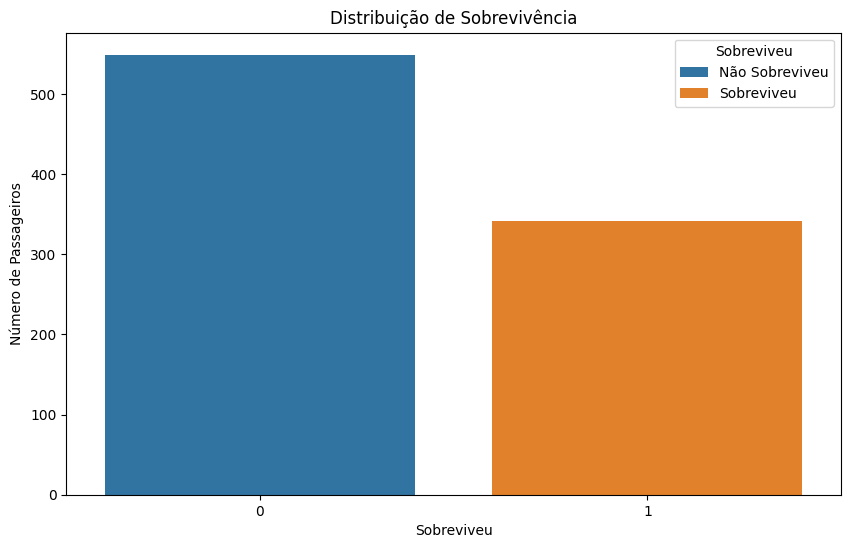

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df, hue='Survived')
plt.title('Distribuição de Sobrevivência')
plt.legend(title='Sobreviveu', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Sobreviveu')
plt.ylabel('Número de Passageiros')
plt.show()

## Correlação de Pearson

- $1$ indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta proporcionalmente).
- $-1$ indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui proporcionalmente).

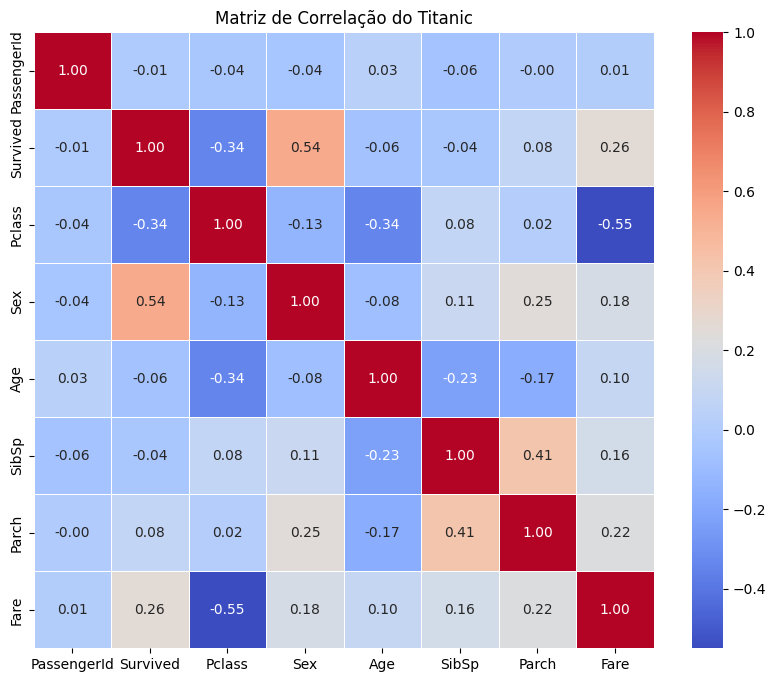

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação do Titanic')
plt.show()

- As colunas, **'alone'**, **'fare'**, **'sex'** e **'pclass'** tem uma influencia maior para o direcionamento vetorial da variavel **'survived'**, o que pode indicar uma possível influência na sobrevivência de um passageiro.

## Box-Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

Text(0.5, 0, 'Sobreviveu')

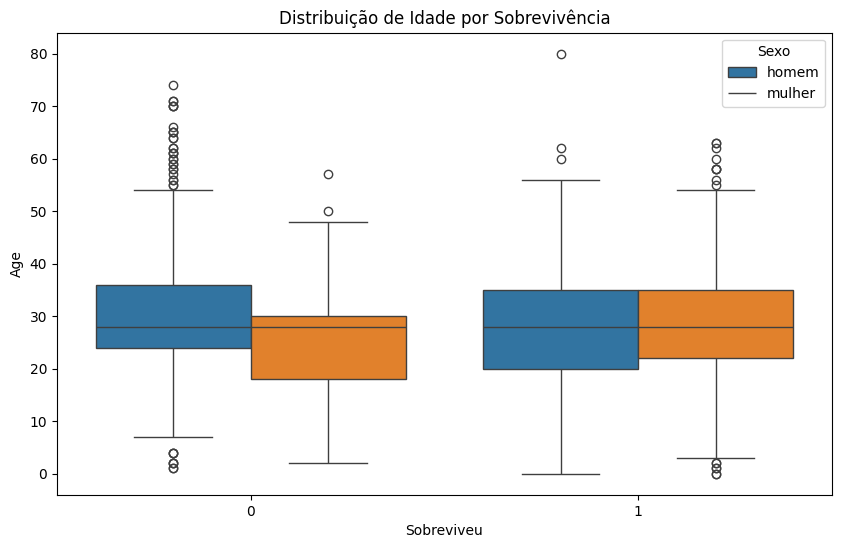

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, hue='Sex')
plt.legend(title='Sexo', labels=['homem', 'mulher'])
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Sobreviveu')

## Gráfico de pizza

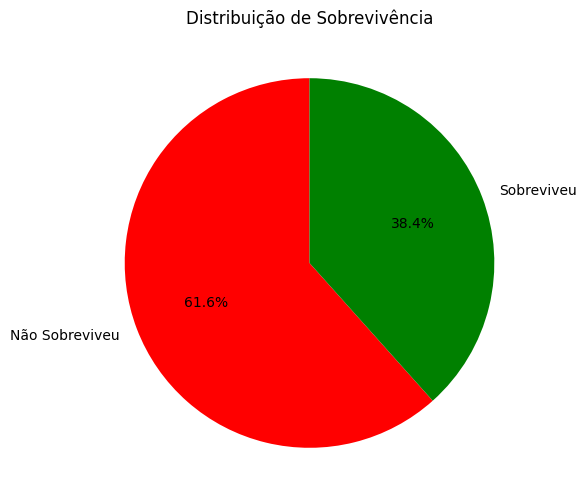

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df['Survived'].value_counts(), labels=['Não Sobreviveu', 'Sobreviveu'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribuição de Sobrevivência')
plt.show()

## Gráfico de Barras

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


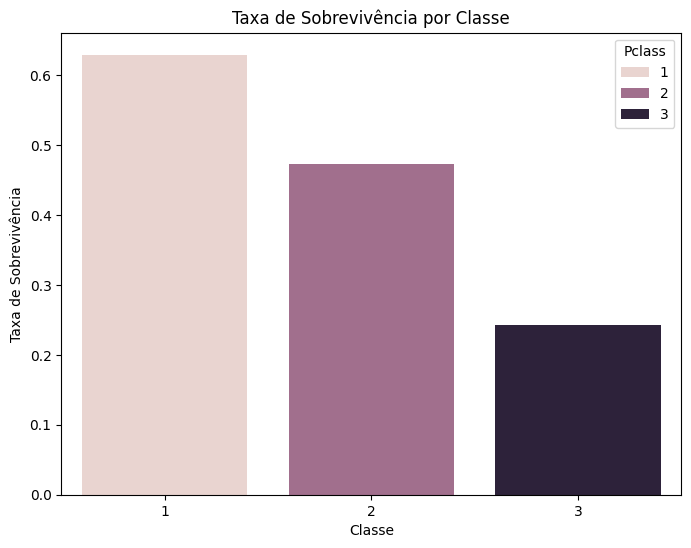

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None, hue='Pclass')
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

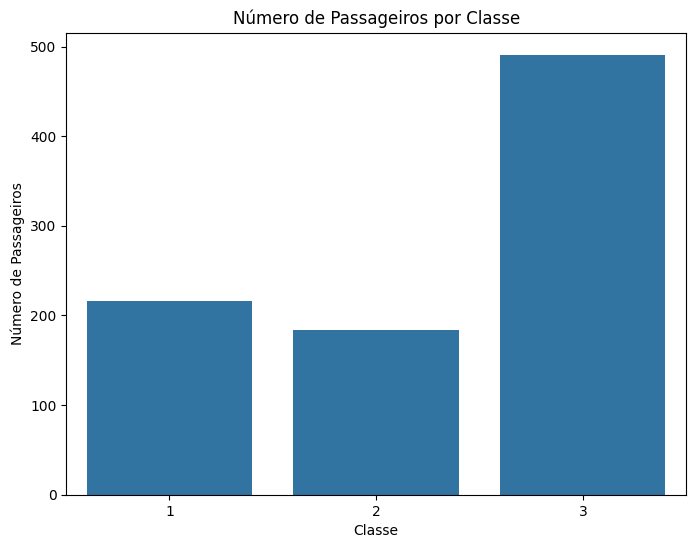

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Número de Passageiros por Classe')
plt.xlabel('Classe')
plt.ylabel('Número de Passageiros')
plt.show()

## Histograma de Idade

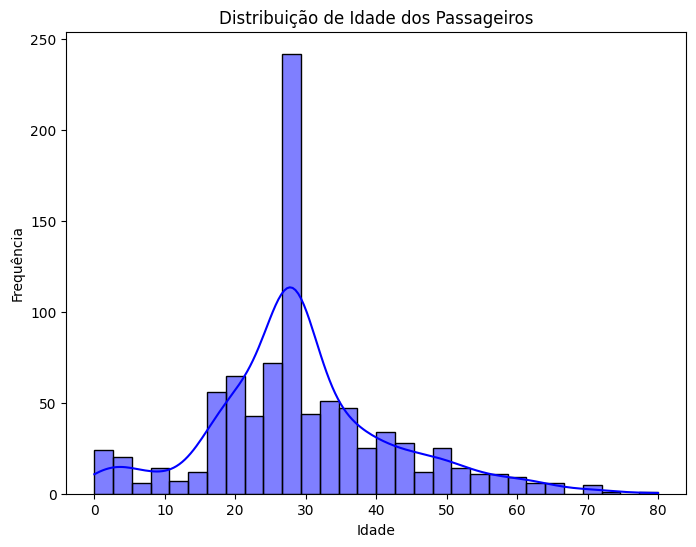

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Teste de Hipotese

Correlação $vs$ Teste de Hipótese

- **Correlação:** Mede a força e a direção da relação entre duas variáveis numéricas. Não envolve diretamente a decisão de aceitar ou rejeitar uma hipótese.

- **Teste de Hipóteses:** É um procedimento formal para decidir entre duas hipóteses baseadas em dados, geralmente envolvendo um cálculo de p-valor e uma regra de decisão.

**O teste de hipóteses** é um procedimento estatístico que envolve a formulação de uma **hipótese nula (H₀)** e uma **hipótese alternativa (H₁)**, seguido de uma análise para determinar se os dados fornecem evidências suficientes para rejeitar a hipótese nula.

## Qui-Quadrado

*Exemplo:*
- **Hipótese nula (H₀):** A classe (class) não tem relação com a sobrevivência (survived). Ou seja, as variáveis são independentes.
- **Hipótese alternativa (H₁):** A classe (class) tem relação com a sobrevivência (survived). Ou seja, as variáveis são dependentes.

Para resolver problemas como este, usamos **Padronização** e **regras de decisão**.

Teste Qui-Quadrados:

É usado para testar a associação entre duas variáveis categóricas ou para testar a conformidade dos dados com uma distribuição esperada. Por exemplo, testar se a coluna classe do bilhete(1, 2, 3) tem relação com a sobrevivência.

Para isso devemos criar uma **tabela de contingência**, que consiste e enumerar a quantidade de uma coluna em relação a outra:



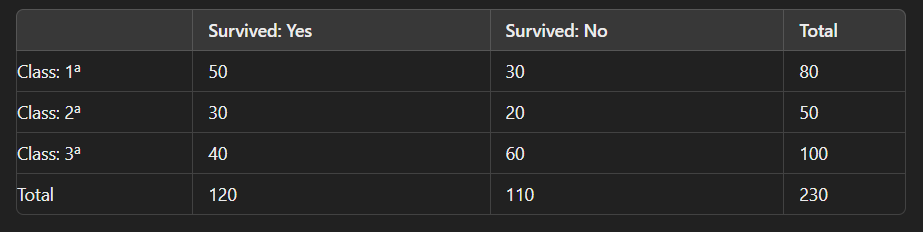

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# tabela de contingência
contingencia = pd.crosstab(df['Pclass'], df['Survived'])

print("Tabela de Contingência:")
print(contingencia)

# teste Qui-Quadrado
chi2_stat, p_value, dof, experado = chi2_contingency(contingencia)

print("\nResultado do Teste Qui-Quadrado:")
print(f"Estatística Qui-Quadrado: {chi2_stat}")
print(f"P-valor: {p_value}")
print(f"Graus de Liberdade: {dof}")
print(f"Valores Esperados:\n{experado}")

# Interpretando o p-valor
alpha = 0.05
if p_value < alpha:
    print("\nRejeitamos a hipótese nula. Existe uma associação significativa entre 'class' e 'survived'.")
else:
    print("\nNão rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que 'class' e 'survived' estão associados.")


Tabela de Contingência:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Resultado do Teste Qui-Quadrado:
Estatística Qui-Quadrado: 102.88898875696056
P-valor: 4.549251711298793e-23
Graus de Liberdade: 2
Valores Esperados:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]

Rejeitamos a hipótese nula. Existe uma associação significativa entre 'class' e 'survived'.


## ANOVA

Agora que temos informações sobre a relevancia da classe do bilhete para sobrevivência, iremos performar o ANOVA para análisar a significância das diferenças
entre as classes.

Para isso, primeiro vamos calcular a taxa de sobrevivência performando uma regressão linear, visando encontrar o coêficiente angular, que mede a relação entre uma variável $X$ para o $Y$ previsto.

Para o teste de hipótese:

- **Hipótese nula (H₀):** As médias das taxas de sobrevivência entre as diferentes classes de passageiros são iguais.
- **Hipótese alternativa (H₁):** Pelo menos uma média da taxa de sobrevivência entre as diferentes classes de passageiros é diferente.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# recebendo as probabilidades atraves da regressão linear
modelo = ols('Survived ~ C(Pclass)', data=df[['Pclass', 'Survived']]).fit()
print(modelo.summary())
print(modelo.params)
resultados = anova_lm(modelo, typ=2)
print()
print(resultados)
print()
alpha = 0.05

if resultados['PR(>F)'][0] < alpha:
    print("Rejeitamos a hipótese nula. As variáveis são dependentes.")
else:
    print("Não rejeitamos a hipótese nula. As variáveis são independentes.")


                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     57.96
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           2.18e-24
Time:                        23:15:55   Log-Likelihood:                -567.30
No. Observations:                 891   AIC:                             1141.
Df Residuals:                     888   BIC:                             1155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6296      0.031     20.

<ipython-input-133-ce80818417a0>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if resultados['PR(>F)'][0] < alpha:


### Tukey

Conforme o ANOVA aponta uma diferença significativa em pelo menos umas das classes, irei realizar o teste de Tukey para verificar quais grupos tem diferenças significativas.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

teste_tukey = pairwise_tukeyhsd(endog=df['Survived'], groups=df['Pclass'], alpha=alpha)

print("Resultado do teste de Tukey:")
print(teste_tukey)

Resultado do teste de Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.1568 0.002 -0.2647 -0.0489   True
     1      3  -0.3873   0.0 -0.4751 -0.2994   True
     2      3  -0.2305   0.0 -0.3234 -0.1375   True
---------------------------------------------------


- Todos os bilhetes possuem uma diferença significativa para sobrevivência so passageiro.
- Vale destacar que a diferença entre a primera e segunda classe em relação a terceira são mais discrepantes.

# Conclusões

> Dado as visualizações através da tabela de correlação, gráficos e testes, é facil informar que a classe do bilhete e o sexo do passageiro, são informações cruciais para determinar de forma probabilistica que, os mesmos que possuem bilhetes da primeira ou segunda classe e são do sexo feminino, possuem uma tendência significantemente maior a sobrevivência no desastre do titânic.

> Isto pode inferir, que o investimento em um bilhete de classe superior impacta de forma significativa a sobrevivência em desatres potênciais, o que pode influênciar na venda de bilhetes mais caros ou mesmo impactar no investimento em segurança para todas as áreas do navio.

> Além disso, vale mencionar a correlação entre o fato de estar viajando sozinho e a sobrevivência, o que indica uma tendência a não sobrevivência quando se está sozinho em um desastre.

# Modelagem

> Por fim, para realizar a predição de sobrevivência com base um modelo probabilistico, irei aplicar Regressão Logistica para prever a taxa de sobrevivência de 'futuros' passageiros do Titanic.
-  Para penalizar variaveis menos impactantes no modelo, utilizarei uma penalização l2, assim posso controlar as variaveis menos relevantes sem removelas completamente.

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,alone
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,0
2,1,3,1,26,0,0,7.9250,1
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,1
887,1,1,1,19,0,0,30.0000,1
888,0,3,1,28,1,2,23.4500,0
889,1,1,0,26,0,0,30.0000,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

param = {
    'logisticregression__penalty': ['l2'],
    'logisticregression__C': np.linspace(0.01, 10, 10),
    'logisticregression__solver': ['sag', 'saga', 'lbfgs'],
    'logisticregression__class_weight': [None, 'balanced']
}

pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
modelo_cv = GridSearchCV(pipeline, param, cv=5, n_jobs=-1, scoring='accuracy')
modelo_cv.fit(X_train, y_train)

print("Melhores parâmetros encontrado:")
print(modelo_cv.best_params_)
print()
y_pred = modelo_cv.predict(X_test)

print("Métricas de classificação:")
print(classification_report(y_test, y_pred))

print()
print("Acuracia:")
print(accuracy_score(y_test, y_pred))

Melhores parâmetros encontrado:
{'logisticregression__C': 1.12, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'sag'}

Métricas de classificação:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Acuracia:
0.8044692737430168


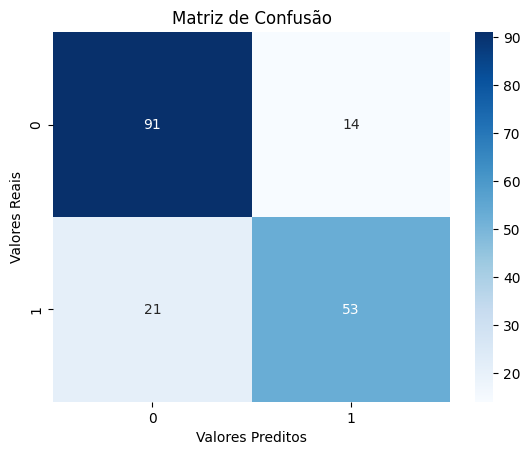

In [ ]:
matriz_conf = confusion_matrix(y_test, y_pred)

sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

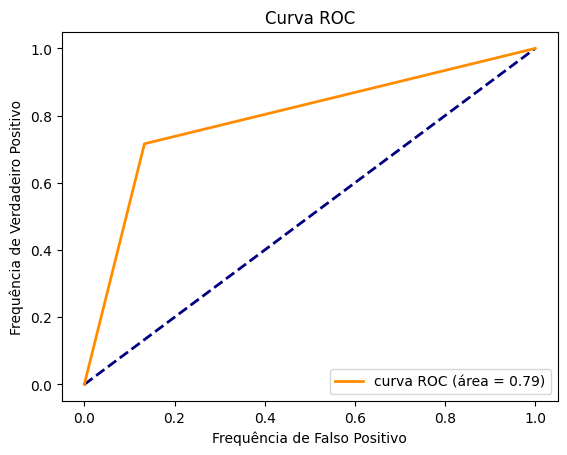

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='curva ROC (área = %0.2f)' % roc_auc)
plt.xlabel('Frequência de Falso Positivo')
plt.ylabel('Frequência de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()